# Import libraries

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

sns.set(rc={'figure.figsize': [9, 9]}, font_scale=1.2)

# Load the data

In [5]:
df = pd.read_csv('Summer22_FootballTransfers.csv')
df

name          position   age            origin_club  \
0           Amine Gouiri    Centre-Forward  22.0               OGC Nice   
1             Umar Sadiq    Centre-Forward  25.0             UD Almería   
2           Carlos Soler  Central Midfield  25.0            Valencia CF   
3          Manuel Akanji       Centre-Back  27.0      Borussia Dortmund   
4              Wout Faes       Centre-Back  24.0            Stade Reims   
...                  ...               ...   ...                    ...   
33820  Kristiyan Kirilov          midfield  17.0     Strumska Slava U19   
33821     Bernard Zrilic        Goalkeeper  17.0  GNK Dinamo Zagreb U17   
33822   Danil Andriyanov        Goalkeeper  18.0          Zenit Izhevsk   
33823     Alexandru Crap         Left-Back   NaN    ACS Foresta Suceava   
33824  Cosmin Ciubotariu       Left Winger  19.0         CSC Dumbravita   

      league_origin_club country_origin_club               new_club  \
0                Ligue 1              France       Stade Rennais FC   
1                 LaLiga               Spain          Real Sociedad   
2                 LaLiga               Spain    Paris Saint-Germain   
3             Bundesliga             Germany        Manchester City   
4                Ligue 1              France         Leicester City   
...                  ...                 ...                    ...   
33820           Bulgaria            Bulgaria           Without Club   
33821            Croatia             Croatia  GNK Dinamo Zagreb U19   
33822   2 League Group 4              Russia           Without Club   
33823            Romania             Romania           Without Club   
33824             Liga 2             Romania           Without Club   

          league_new_club country_new_club player_valuje     cost  \
0                 Ligue 1           France       €42.00m  €28.00m   
1                  LaLiga            Spain       €18.00m  €20.00m   
2                 Ligue 1           France       €50.00m  €18.00m   
3          Premier League          England       €30.00m  €17.50m   
4          Premier League          England       €10.00m  €17.00m   
...                   ...              ...           ...      ...   
33820                 NaN              NaN        €10Th.        -   
33821  Prva HNL - Juniori          Croatia        €10Th.        -   
33822                 NaN              NaN        €10Th.        -   
33823                 NaN              NaN        €10Th.        -   
33824                 NaN              NaN        €10Th.        -   

      date_of_transfer  
0           2022-09-01  
1           2022-09-01  
2           2022-09-01  
3           2022-09-01  
4           2022-09-01  
...                ...  
33820       2022-07-01  
33821       2022-07-01  
33822       2022-07-01  
33823       2022-07-01  
33824       2022-07-01  

[33825 rows x 12 columns]

# Extract some informtion

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33825 entries, 0 to 33824
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 33825 non-null  object 
 1   position             33824 non-null  object 
 2   age                  33674 non-null  float64
 3   origin_club          33825 non-null  object 
 4   league_origin_club   32903 non-null  object 
 5   country_origin_club  32903 non-null  object 
 6   new_club             33825 non-null  object 
 7   league_new_club      28351 non-null  object 
 8   country_new_club     28351 non-null  object 
 9   player_valuje        33825 non-null  object 
 10  cost                 33825 non-null  object 
 11  date_of_transfer     33825 non-null  object 
dtypes: float64(1), object(11)
memory usage: 3.1+ MB


In [7]:
df.describe()

age
count  33674.000000
mean      25.004603
std        4.788442
min       15.000000
25%       21.000000
50%       24.000000
75%       28.000000
max       46.000000

In [8]:
df.isna().sum()

name                      0
position                  1
age                     151
origin_club               0
league_origin_club      922
country_origin_club     922
new_club                  0
league_new_club        5474
country_new_club       5474
player_valuje             0
cost                      0
date_of_transfer          0
dtype: int64

In [9]:
df.isna().mean() * 100

name                    0.000000
position                0.002956
age                     0.446415
origin_club             0.000000
league_origin_club      2.725795
country_origin_club     2.725795
new_club                0.000000
league_new_club        16.183296
country_new_club       16.183296
player_valuje           0.000000
cost                    0.000000
date_of_transfer        0.000000
dtype: float64

#**Data Cleaning**

# fix position column

In [10]:
# we have one record has null value in position column , so drop it
df.dropna(subset = ['position'] , inplace = True)

In [11]:
df.isna().sum()

name                      0
position                  0
age                     151
origin_club               0
league_origin_club      922
country_origin_club     922
new_club                  0
league_new_club        5474
country_new_club       5474
player_valuje             0
cost                      0
date_of_transfer          0
dtype: int64

# fix age column

In [12]:
df['age'].mode()

0    21.0
Name: age, dtype: float64

In [13]:
df['age'].median()

24.0

In [14]:
df['age'].fillna(df['age'].median() , inplace = True)

In [15]:
df.isna().sum()

name                      0
position                  0
age                       0
origin_club               0
league_origin_club      922
country_origin_club     922
new_club                  0
league_new_club        5474
country_new_club       5474
player_valuje             0
cost                      0
date_of_transfer          0
dtype: int64

# fix league_origin_club & country_origin_club

In [16]:
# we have approximately 2.7% from data are nulls , so the best solution is to drop it
df.dropna(subset = ['league_origin_club' , 'country_origin_club'] , inplace = True)

In [17]:
df.isna().sum()

name                      0
position                  0
age                       0
origin_club               0
league_origin_club        0
country_origin_club       0
new_club                  0
league_new_club        5456
country_new_club       5456
player_valuje             0
cost                      0
date_of_transfer          0
dtype: int64

# fix league_new_club & country_new_club

In [18]:
df['league_new_club'].fillna('Unknown' , inplace = True)
df['country_new_club'].fillna('Unknown' , inplace = True)

In [19]:
df.isna().sum()

name                   0
position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
player_valuje          0
cost                   0
date_of_transfer       0
dtype: int64

# fix player_value column

In [20]:
df['player_valuje'] = df['player_valuje'].str.replace("â‚¬" , "")
df['player_valuje'] = df['player_valuje'].str.replace("€" , "")

In [21]:
df['player_valuje'].reset_index()

index player_valuje
0          0        42.00m
1          1        18.00m
2          2        50.00m
3          3        30.00m
4          4        10.00m
...      ...           ...
32897  33820         10Th.
32898  33821         10Th.
32899  33822         10Th.
32900  33823         10Th.
32901  33824         10Th.

[32902 rows x 2 columns]

In [22]:
def fix_player_value(s):
  try:
    if s.endswith('m'):
      return float(s[:-1]) * 1000000
    elif s.endswith("Th."):
      return float(s[:-3]) * 1000
    else:
      return np.nan
  except:
    return np.nan

In [23]:
df['player_valuje'] = df['player_valuje'].apply(fix_player_value)

In [24]:
df['player_valuje']

0        42000000.0
1        18000000.0
2        50000000.0
3        30000000.0
4        10000000.0
            ...    
33820       10000.0
33821       10000.0
33822       10000.0
33823       10000.0
33824       10000.0
Name: player_valuje, Length: 32902, dtype: float64

In [25]:
df['player_valuje'].value_counts()

50000.0       5035
25000.0       4443
100000.0      3363
75000.0       2453
150000.0      2429
              ... 
24000000.0       1
15000.0          1
8500000.0        1
4800000.0        1
8000.0           1
Name: player_valuje, Length: 118, dtype: int64

# Fix cost column

In [26]:
df['cost'] = df['cost'].str.replace("â‚¬" , "")
df['cost'] = df['cost'].str.replace("€" , "")

In [27]:
def fix_cost(s):
  try:
    if s.endswith('m'):
      return float(s[:-1]) * 1000000
    elif s.endswith("Th."):
      return float(s[:-3]) * 1000 ## convert from th to millions
    else:
      return np.nan
  except:
    return np.nan

In [28]:
df['cost'] = df['cost'].apply(fix_cost)
df['cost']

0        28000000.0
1        20000000.0
2        18000000.0
3        17500000.0
4        17000000.0
            ...    
33820           NaN
33821           NaN
33822           NaN
33823           NaN
33824           NaN
Name: cost, Length: 32902, dtype: float64

In [29]:
# we have in cost column free transfer & loan transfer , we will replace it with 0 to make a column numeric
df['cost'] = df['cost'].replace(np.nan , 0)

In [30]:
df['cost'].value_counts()

0.0           31577
1000000.0        73
500000.0         56
2000000.0        51
1500000.0        47
              ...  
9400000.0         1
296000.0          1
67000000.0        1
14700000.0        1
12000.0           1
Name: cost, Length: 319, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32902 entries, 0 to 33824
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 32902 non-null  object 
 1   position             32902 non-null  object 
 2   age                  32902 non-null  float64
 3   origin_club          32902 non-null  object 
 4   league_origin_club   32902 non-null  object 
 5   country_origin_club  32902 non-null  object 
 6   new_club             32902 non-null  object 
 7   league_new_club      32902 non-null  object 
 8   country_new_club     32902 non-null  object 
 9   player_valuje        32902 non-null  float64
 10  cost                 32902 non-null  float64
 11  date_of_transfer     32902 non-null  object 
dtypes: float64(3), object(9)
memory usage: 3.3+ MB


In [32]:
df.isna().sum()

name                   0
position               0
age                    0
origin_club            0
league_origin_club     0
country_origin_club    0
new_club               0
league_new_club        0
country_new_club       0
player_valuje          0
cost                   0
date_of_transfer       0
dtype: int64

# Convert transfer_date column to date_time format

In [33]:
df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'],format ='%Y-%m-%d')

In [34]:
df['month_of_transfer'] = df['date_of_transfer'].dt.month_name()

In [35]:
df

name          position   age            origin_club  \
0           Amine Gouiri    Centre-Forward  22.0               OGC Nice   
1             Umar Sadiq    Centre-Forward  25.0             UD Almería   
2           Carlos Soler  Central Midfield  25.0            Valencia CF   
3          Manuel Akanji       Centre-Back  27.0      Borussia Dortmund   
4              Wout Faes       Centre-Back  24.0            Stade Reims   
...                  ...               ...   ...                    ...   
33820  Kristiyan Kirilov          midfield  17.0     Strumska Slava U19   
33821     Bernard Zrilic        Goalkeeper  17.0  GNK Dinamo Zagreb U17   
33822   Danil Andriyanov        Goalkeeper  18.0          Zenit Izhevsk   
33823     Alexandru Crap         Left-Back  24.0    ACS Foresta Suceava   
33824  Cosmin Ciubotariu       Left Winger  19.0         CSC Dumbravita   

      league_origin_club country_origin_club               new_club  \
0                Ligue 1              France       Stade Rennais FC   
1                 LaLiga               Spain          Real Sociedad   
2                 LaLiga               Spain    Paris Saint-Germain   
3             Bundesliga             Germany        Manchester City   
4                Ligue 1              France         Leicester City   
...                  ...                 ...                    ...   
33820           Bulgaria            Bulgaria           Without Club   
33821            Croatia             Croatia  GNK Dinamo Zagreb U19   
33822   2 League Group 4              Russia           Without Club   
33823            Romania             Romania           Without Club   
33824             Liga 2             Romania           Without Club   

          league_new_club country_new_club  player_valuje        cost  \
0                 Ligue 1           France     42000000.0  28000000.0   
1                  LaLiga            Spain     18000000.0  20000000.0   
2                 Ligue 1           France     50000000.0  18000000.0   
3          Premier League          England     30000000.0  17500000.0   
4          Premier League          England     10000000.0  17000000.0   
...                   ...              ...            ...         ...   
33820             Unknown          Unknown        10000.0         0.0   
33821  Prva HNL - Juniori          Croatia        10000.0         0.0   
33822             Unknown          Unknown        10000.0         0.0   
33823             Unknown          Unknown        10000.0         0.0   
33824             Unknown          Unknown        10000.0         0.0   

      date_of_transfer month_of_transfer  
0           2022-09-01         September  
1           2022-09-01         September  
2           2022-09-01         September  
3           2022-09-01         September  
4           2022-09-01         September  
...                ...               ...  
33820       2022-07-01              July  
33821       2022-07-01              July  
33822       2022-07-01              July  
33823       2022-07-01              July  
33824       2022-07-01              July  

[32902 rows x 13 columns]

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32902 entries, 0 to 33824
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   name                 32902 non-null  object        
 1   position             32902 non-null  object        
 2   age                  32902 non-null  float64       
 3   origin_club          32902 non-null  object        
 4   league_origin_club   32902 non-null  object        
 5   country_origin_club  32902 non-null  object        
 6   new_club             32902 non-null  object        
 7   league_new_club      32902 non-null  object        
 8   country_new_club     32902 non-null  object        
 9   player_valuje        32902 non-null  float64       
 10  cost                 32902 non-null  float64       
 11  date_of_transfer     32902 non-null  datetime64[ns]
 12  month_of_transfer    32902 non-null  object        
dtypes: datetime64[ns](1), float64(3

In [37]:
df

name          position   age            origin_club  \
0           Amine Gouiri    Centre-Forward  22.0               OGC Nice   
1             Umar Sadiq    Centre-Forward  25.0             UD Almería   
2           Carlos Soler  Central Midfield  25.0            Valencia CF   
3          Manuel Akanji       Centre-Back  27.0      Borussia Dortmund   
4              Wout Faes       Centre-Back  24.0            Stade Reims   
...                  ...               ...   ...                    ...   
33820  Kristiyan Kirilov          midfield  17.0     Strumska Slava U19   
33821     Bernard Zrilic        Goalkeeper  17.0  GNK Dinamo Zagreb U17   
33822   Danil Andriyanov        Goalkeeper  18.0          Zenit Izhevsk   
33823     Alexandru Crap         Left-Back  24.0    ACS Foresta Suceava   
33824  Cosmin Ciubotariu       Left Winger  19.0         CSC Dumbravita   

      league_origin_club country_origin_club               new_club  \
0                Ligue 1              France       Stade Rennais FC   
1                 LaLiga               Spain          Real Sociedad   
2                 LaLiga               Spain    Paris Saint-Germain   
3             Bundesliga             Germany        Manchester City   
4                Ligue 1              France         Leicester City   
...                  ...                 ...                    ...   
33820           Bulgaria            Bulgaria           Without Club   
33821            Croatia             Croatia  GNK Dinamo Zagreb U19   
33822   2 League Group 4              Russia           Without Club   
33823            Romania             Romania           Without Club   
33824             Liga 2             Romania           Without Club   

          league_new_club country_new_club  player_valuje        cost  \
0                 Ligue 1           France     42000000.0  28000000.0   
1                  LaLiga            Spain     18000000.0  20000000.0   
2                 Ligue 1           France     50000000.0  18000000.0   
3          Premier League          England     30000000.0  17500000.0   
4          Premier League          England     10000000.0  17000000.0   
...                   ...              ...            ...         ...   
33820             Unknown          Unknown        10000.0         0.0   
33821  Prva HNL - Juniori          Croatia        10000.0         0.0   
33822             Unknown          Unknown        10000.0         0.0   
33823             Unknown          Unknown        10000.0         0.0   
33824             Unknown          Unknown        10000.0         0.0   

      date_of_transfer month_of_transfer  
0           2022-09-01         September  
1           2022-09-01         September  
2           2022-09-01         September  
3           2022-09-01         September  
4           2022-09-01         September  
...                ...               ...  
33820       2022-07-01              July  
33821       2022-07-01              July  
33822       2022-07-01              July  
33823       2022-07-01              July  
33824       2022-07-01              July  

[32902 rows x 13 columns]

## Questions :

1 ) Which players have the highest transfer fees?

2 ) What is the average age of the transferred players?

3 ) Which clubs have made the most signings?

4 ) What is the distribution of transfer costs?

5 ) Which leagues have the most players transferred to?

6 ) What is the average value of players in each position?

7 ) What is the average transfer cost for each position ?

8 ) Which country has the highest number of players transferred?

9 ) Which leagues have the highest number of players transferred ?

10 ) Which leagues have the highest number of players transferred ?

11 ) Which countries have the highest number of players transferred to ?

12 ) What is the relationship between player value and transfer cost?

13 ) What is the distribution of transfer dates months?

14 ) Which month has most tranfers did in it ?

15 ) Which the most position that take part in transfers ?

16 ) What is the most expensive 5 players depend on them values ?

17 ) Which club does buy a player its value exceed 100 million ?

18 ) Which club made the most signings in terms of total player value?

19 ) Which club has the highest average transfer cost ? (sell players)

20 ) Which club has the highest average transfer cost ? (buy players)

21 ) What is the distribution of transfer costs for each league ?

22 ) Is there a correlation between player age and transfer cost ?

23 ) How many players where transfered from each country ?

24 ) What is the total transfer cost for each league ?

25 ) How many players were signed out each club from a different league ?

26 ) Are there any ouliers in transfer costs ?

27 ) Which clubs have spent the highest amount on transfers ?

28 ) Which clubs have the highest average player age ?

29 ) How does the transfer cost vary between different positions ?

30 ) For each league and position combination , What is the total transfer cost ?

31 ) What is the average player value for each league and position combination?

32 ) What is the distribution of transfer costs within each league ? Visualize the distribution of transfer costs for each league

33 ) How does the player value vary between different positions? Visualize the player value for each position.

34 ) What is the distribution of transfer costs within each league and position combination?













In [38]:
# Which players have the highest transfer fees

highest_fees = df.sort_values(by = 'cost' , ascending = False).head(1)
highest_fees

name      position   age     origin_club league_origin_club  \
1275  Antony  Right Winger  22.0  Ajax Amsterdam         Eredivisie   

     country_origin_club           new_club league_new_club country_new_club  \
1275         Netherlands  Manchester United  Premier League          England   

      player_valuje        cost date_of_transfer month_of_transfer  
1275     35000000.0  95000000.0       2022-08-30            August

In [39]:
highest_fees[['name' , 'cost']]

name        cost
1275  Antony  95000000.0

In [40]:
# What is the average age of the transferred players?

df['age'].mean()

24.93693392498936

In [41]:
# Which clubs have made the most signings?
df['new_club'].value_counts().head()

Without Club      4858
Retired            335
Unknown            228
Career break        28
Potenza Calcio      26
Name: new_club, dtype: int64

In [42]:
#Which leagues have the most players transferred to?
df['league_new_club'].value_counts().head()

Unknown    5456
Italy       805
Spain       503
Liga 2      418
Romania     353
Name: league_new_club, dtype: int64

In [43]:
# What is the average value of players in each position?

average_value_by_position = df.groupby('position')['player_valuje'].mean()
average_value_by_position

position
Attacking Midfield    490975.446429
Central Midfield      568137.612108
Centre-Back           515698.698315
Centre-Forward        611939.089418
Defensive Midfield    537598.684211
Goalkeeper            233305.033354
Left Midfield         291607.594937
Left Winger           627401.785714
Left-Back             473430.182134
Right Midfield        204684.095861
Right Winger          553551.577956
Right-Back            380774.248200
Second Striker        653580.858086
attack                 54114.754098
defence                38464.566929
midfield               40028.957529
Name: player_valuje, dtype: float64

In [44]:
# What is the average transfer cost for each position ?
average_cost_by_position = df.groupby('position')['cost'].mean()
average_cost_by_position

position
Attacking Midfield    140775.000000
Central Midfield      176684.136771
Centre-Back           222900.459418
Centre-Forward        262929.860541
Defensive Midfield    230713.815789
Goalkeeper             40967.252881
Left Midfield          45146.835443
Left Winger           255753.571429
Left-Back             196744.579358
Right Midfield         19145.969499
Right Winger          207232.218559
Right-Back             95605.252012
Second Striker        188267.326733
attack                    32.786885
defence                    0.000000
midfield                   0.000000
Name: cost, dtype: float64

In [45]:
# Which country has the highest number of players transferred?
country_with_highest_transfers = df['country_origin_club'].value_counts().idxmax()
country_with_highest_transfers

'Italy'

In [46]:
# Which leagues have the highest number of players transferred ?
league_with_highest_transfers = df['league_origin_club'].value_counts().head()
league_with_highest_transfers

Italy             931
Spain             600
Premier League    495
Serie A           488
Romania           450
Name: league_origin_club, dtype: int64

In [47]:
# Which countries have the highest number of players transferred to ?
country_with_highest_signs = df['country_new_club'].value_counts().head()
country_with_highest_signs

Unknown    5456
Italy      3977
Spain      2110
Germany    1421
Turkey     1087
Name: country_new_club, dtype: int64

In [48]:
# What is the relationship between player value and transfer cost?
px.scatter(df , x = 'player_valuje' , y = 'cost')

In [49]:
# show the correlation between player value and its cost , and we found the correlation is high
df['player_valuje'].corr(df['cost'])

0.7354493456651622

In [50]:
# Scatter plot to show the correlation
px.scatter(df , x = 'player_valuje' , y = 'cost')

In [51]:
# What is the distribution of transfer dates months ?
fig = px.histogram(df , x = 'month_of_transfer')
fig.show()

In [52]:
# Which month has most tranfers did in it ?
df['month_of_transfer'].value_counts().idxmax()

'July'

<Axes: xlabel='count', ylabel='month_of_transfer'>

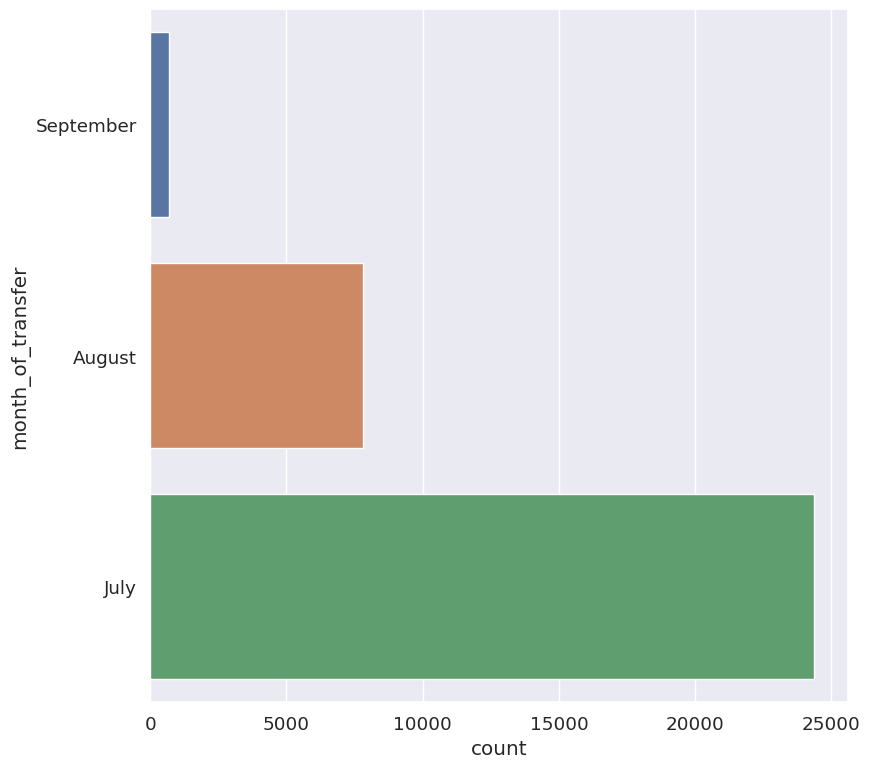

In [53]:
# Distribution of the highest month that transfers did in it
sns.countplot(y='month_of_transfer', data=df, palette='deep')

In [54]:
# Which the most position that take part in transfers ?
most_position_transfers = df['position'].value_counts().idxmax()
most_position_transfers

'Centre-Back'

<Axes: xlabel='count', ylabel='position'>

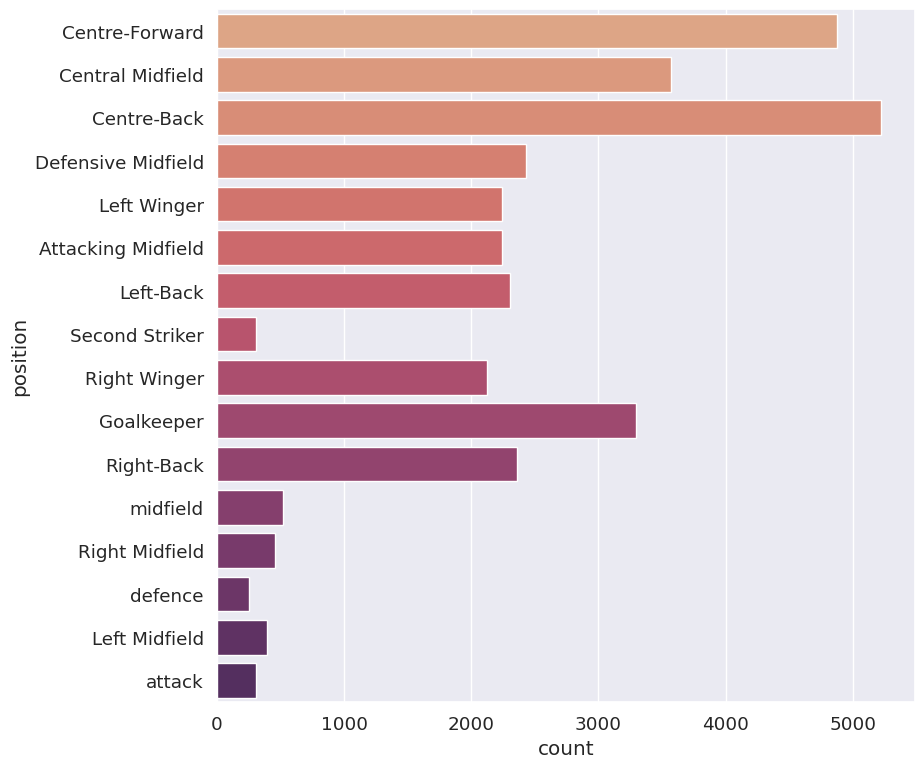

In [55]:
# Distribution for the position
sns.countplot(y='position', data=df, palette='flare')

<Axes: xlabel='count', ylabel='month_of_transfer'>

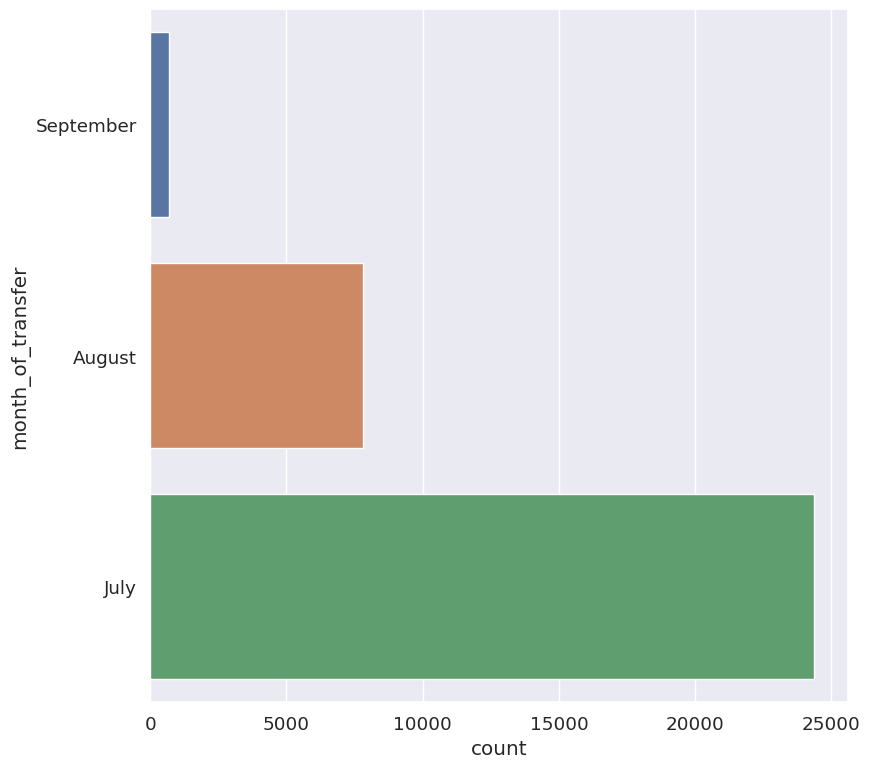

In [56]:
# Distribution of month transfers
sns.countplot(y='month_of_transfer', data=df, palette='deep')

In [57]:
# What is the most expensive 5 players depend on them values ?
highest_value = df.sort_values(by = 'player_valuje' , ascending = False).head(5)
highest_value

name        position   age        origin_club  \
19427    Erling Haaland  Centre-Forward  21.0  Borussia Dortmund   
12900  Matthijs de Ligt     Centre-Back  22.0        Juventus FC   
19436        Sadio Mané     Left Winger  30.0       Liverpool FC   
19478     Romelu Lukaku  Centre-Forward  29.0         Chelsea FC   
15301   Raheem Sterling     Left Winger  27.0    Manchester City   

      league_origin_club country_origin_club         new_club league_new_club  \
19427         Bundesliga             Germany  Manchester City  Premier League   
12900            Serie A               Italy    Bayern Munich      Bundesliga   
19436     Premier League             England    Bayern Munich      Bundesliga   
19478     Premier League             England      Inter Milan         Serie A   
15301     Premier League             England       Chelsea FC  Premier League   

      country_new_club  player_valuje        cost date_of_transfer  \
19427          England    150000000.0  60000000.0       2022-07-01   
12900          Germany     70000000.0  67000000.0       2022-07-19   
19436          Germany     70000000.0  32000000.0       2022-07-01   
19478            Italy     70000000.0         0.0       2022-07-01   
15301          England     70000000.0  56200000.0       2022-07-13   

      month_of_transfer  
19427              July  
12900              July  
19436              July  
19478              July  
15301              July

In [58]:
# Which club does buy a player its value exceed 100 million ?
highest_player_value = df[df['player_valuje'] >= 100000000 ]
highest_player_value[['new_club' , 'player_valuje']]

new_club  player_valuje
19427  Manchester City    150000000.0

In [59]:
# Which club made the most signings in terms of total player value?
club_signings_value = df.groupby('new_club')['player_valuje'].sum()
club_with_most_signings = club_signings_value.idxmax()
total_value = club_signings_value.max()
club_with_most_signings, total_value

('Without Club', 773988000.0)

In [60]:
# Which club has the highest average transfer cost ? (sell players to other clubs)
highest_club_average_transfer = df.groupby('origin_club')['cost'].mean().idxmax()
highest_club_average_transfer

'Leicester City'

In [61]:
# Which club has the highest average transfer cost ? (buy players from other clubs)
highest_club_average_transfer = df.groupby('new_club')['cost'].mean().idxmax()
highest_club_average_transfer

'Manchester City'

In [62]:
# What is the distribution of transfer costs for each league ?
fig = px.box(df, x='league_origin_club', y='cost', points='all')
fig.show()

In [63]:
# Is there a correlation between player age and transfer cost ?
df['age'].corr(df['cost'])
# Answer : not a strong correlation so , their is no relation between age and cost of player

-0.020337983130467568

In [64]:
# How many players where transfered from each country ?
players_transferred_by_country = df['country_origin_club'].value_counts()
players_transferred_by_country

Italy                  4781
Spain                  2576
Germany                1743
Russia                 1383
Turkey                 1179
                       ... 
Djibouti                  1
Niger                     1
Trinidad and Tobago       1
Senegal                   1
Neukaledonien             1
Name: country_origin_club, Length: 153, dtype: int64

In [65]:
# What is the total transfer cost for each league ?
total_transfer_cost_by_league = df.groupby('league_origin_club')['cost'].sum().sort_values(ascending = False).reset_index()
total_transfer_cost_by_league

league_origin_club         cost
0        Premier League  882919000.0
1               Serie A  715985000.0
2            Bundesliga  644875000.0
3               Ligue 1  595720000.0
4                LaLiga  436250000.0
..                  ...          ...
458    Kolmonen Etelä C          0.0
459          Kazakhstan          0.0
460  Kakkonen - Group C          0.0
461  Kakkonen - Group B          0.0
462              Monaco          0.0

[463 rows x 2 columns]

In [66]:
# How many players were signed out each club from a different league ?
df[df['league_new_club'] != df['league_origin_club']]['origin_club'].value_counts().reset_index()

index  origin_club
0               Atalanta BC           46
1                 Genoa CFC           34
2      FK Proleter Novi Sad           31
3               US Sassuolo           30
4         Juventus Next Gen           29
...                     ...          ...
5020        Newtown AFC U19            1
5021           TJ Sokol Lom            1
5022     Khaan Khuns-Erchim            1
5023          FK Kara-Balta            1
5024  GNK Dinamo Zagreb U17            1

[5025 rows x 2 columns]

In [67]:
# Are there any ouliers in transfer costs ?
fig = px.box(df , y = 'cost')
fig.show()

# Yes there is an outliers in transfer costs

In [68]:
!pip install datasist

In [69]:
# another solution to detect outliers
from datasist.structdata import detect_outliers

In [80]:
idx = detect_outliers(df, 0, ['cost'])
outliers = df.loc[idx]
outliers

# we found 1325 rows are outliers

name          position   age                 origin_club  \
0           Amine Gouiri    Centre-Forward  22.0                    OGC Nice   
1             Umar Sadiq    Centre-Forward  25.0                  UD Almería   
2           Carlos Soler  Central Midfield  25.0                 Valencia CF   
3          Manuel Akanji       Centre-Back  27.0           Borussia Dortmund   
4              Wout Faes       Centre-Back  24.0                 Stade Reims   
...                  ...               ...   ...                         ...   
19929       Kundai Benyu  Central Midfield  24.0           Vestri Ísafjördur   
19930       Oliver Byrne        Goalkeeper  24.0        Connah's Quay Nomads   
19931  Dariusz Pawlowski    Right Midfield  23.0               Górnik Zabrze   
19932    Alexandru Mogos       Left Winger  19.0  CS Corvinul 1921 Hunedoara   
19933  Alexandru Dusmanu       Left Winger  21.0        Sport Team Bucharest   

      league_origin_club country_origin_club             new_club  \
0                Ligue 1              France     Stade Rennais FC   
1                 LaLiga               Spain        Real Sociedad   
2                 LaLiga               Spain  Paris Saint-Germain   
3             Bundesliga             Germany      Manchester City   
4                Ligue 1              France       Leicester City   
...                  ...                 ...                  ...   
19929        Lengjudeild             Iceland   ÍBV Vestmannaeyjar   
19930      Cymru Premier               Wales        Altrincham FC   
19931        Ekstraklasa              Poland       Radomiak Radom   
19932            Romania             Romania   Ripensia Timisoara   
19933            Romania             Romania      FC Hermannstadt   

       league_new_club country_new_club  player_valuje        cost  \
0              Ligue 1           France     42000000.0  28000000.0   
1               LaLiga            Spain     18000000.0  20000000.0   
2              Ligue 1           France     50000000.0  18000000.0   
3       Premier League          England     30000000.0  17500000.0   
4       Premier League          England     10000000.0  17000000.0   
...                ...              ...            ...         ...   
19929      Besta deild          Iceland        75000.0     14000.0   
19930  National League          England       125000.0     12000.0   
19931      Ekstraklasa           Poland       300000.0     10000.0   
19932           Liga 2          Romania        50000.0     10000.0   
19933        SuperLiga          Romania       125000.0     10000.0   

      date_of_transfer month_of_transfer  
0           2022-09-01         September  
1           2022-09-01         September  
2           2022-09-01         September  
3           2022-09-01         September  
4           2022-09-01         September  
...                ...               ...  
19929       2022-07-01              July  
19930       2022-07-01              July  
19931       2022-07-01              July  
19932       2022-07-01              July  
19933       2022-07-01              July  

[1325 rows x 13 columns]

In [71]:
# Which clubs have spent the highest amount on transfers ?
highest_club_of_transfers = df.groupby('new_club')['cost'].sum().sort_values(ascending = False).head(10).reset_index()
highest_club_of_transfers

new_club         cost
0               Chelsea FC  278990000.0
1        Manchester United  238020000.0
2          West Ham United  182000000.0
3        Tottenham Hotspur  169900000.0
4        Nottingham Forest  156950000.0
5             FC Barcelona  153000000.0
6      Paris Saint-Germain  147500000.0
7          Manchester City  139500000.0
8            Bayern Munich  137500000.0
9  Wolverhampton Wanderers  136600000.0

In [72]:
average_age_by_league = df.groupby('league_origin_club')['age'].mean()
average_age_by_league

league_origin_club
1. CFL                  24.244681
1. Dorostenecka liga    17.750000
1. Liga gr. 1           23.500000
1. Liga gr. 2           24.000000
1. Liga gr. 3           23.076923
                          ...    
Westfalenliga 2         25.000000
Ykkönen                 22.619048
Zambia                  24.500000
eWinner 2 liga          26.913043
efbet Liga              25.531915
Name: age, Length: 463, dtype: float64

In [73]:
# Which clubs have the highest average player age ?
df.groupby('new_club')['age'].mean().head(10)

new_club
1. FC Köln                 22.600000
1. FC Leibnitz             31.000000
1. Wiener Neustädter SC    27.500000
1.FC Bocholt               25.571429
1.FC Bruchsal              21.000000
1.FC Düren                 24.285714
1.FC Düren II              19.000000
1.FC Heidenheim 1846       21.428571
1.FC Kaan-Marienborn       26.833333
1.FC Kaiserslautern        26.888889
Name: age, dtype: float64

In [74]:
# How does the transfer cost vary between different positions ?
# Calculate the minimum, maximum, and average transfer cost for each position.
position_stats = df.groupby('position')['cost'].agg(['min' , 'max' , 'mean'])
position_stats

min         max           mean
position                                          
Attacking Midfield  0.0  42950000.0  140775.000000
Central Midfield    0.0  45000000.0  176684.136771
Centre-Back         0.0  80400000.0  222900.459418
Centre-Forward      0.0  75000000.0  262929.860541
Defensive Midfield  0.0  80000000.0  230713.815789
Goalkeeper          0.0  14000000.0   40967.252881
Left Midfield       0.0  12000000.0   45146.835443
Left Winger         0.0  56200000.0  255753.571429
Left-Back           0.0  65300000.0  196744.579358
Right Midfield      0.0   3000000.0   19145.969499
Right Winger        0.0  95000000.0  207232.218559
Right-Back          0.0  20000000.0   95605.252012
Second Striker      0.0  23600000.0  188267.326733
attack              0.0     10000.0      32.786885
defence             0.0         0.0       0.000000
midfield            0.0         0.0       0.000000

In [75]:
# For each league and position combination , What is the total transfer cost ?
# Use pivot_table
pivot_table = pd.pivot_table(index = 'league_new_club', columns = 'position' , values = 'cost' , data = df , aggfunc = 'sum' , fill_value = 0).head(30)
#fill_value parameter replace each null with 0
pivot_table

position               Attacking Midfield  Central Midfield  Centre-Back  \
league_new_club                                                            
1. CFL                                  0                 0            0   
1. Dorostenecka liga                    0                 0            0   
1. Liga gr. 1                           0                 0            0   
1. Liga gr. 2                           0                 0            0   
1. Liga gr. 3                           0                 0            0   
1. deild                                0                 0            0   
1.Division                         895000            125000       138000   
1.Lig                              150000                 0       167000   
1.Liga                                  0                 0            0   
1ste Nationale                          0                 0            0   
2 League Group 1                        0                 0            0   
2 League Group 2                        0                 0            0   
2 League Group 3                        0                 0            0   
2 League Group 4                        0                 0            0   
2. Bundesliga                           0           2930000      8230000   
2. LL NÖ Ost                            0                 0            0   
2. LL NÖ West                           0                 0            0   
2. Liga                                 0                 0            0   
2. Liga Inter - Gr. 1                   0                 0            0   
2. Liga Inter - Gr. 2                   0                 0            0   
2. Liga Inter - Gr. 3                   0                 0            0   
2. Liga Inter - Gr. 4                   0                 0            0   
2. Liga Inter - Gr. 5                   0                 0            0   
2. deild                                0                 0            0   
2.Division                              0                 0            0   
2.Lig Beyaz                             0                 0            0   
2.Lig Kirmizi                           0                 0            0   
2de Nationale ACFF                      0                 0            0   
2de Nationale VFV A                     0                 0            0   
2de Nationale VFV B                     0                 0            0   

position               Centre-Forward  Defensive Midfield  Goalkeeper  \
league_new_club                                                         
1. CFL                              0                   0           0   
1. Dorostenecka liga                0                   0           0   
1. Liga gr. 1                       0                   0           0   
1. Liga gr. 2                       0                   0           0   
1. Liga gr. 3                       0                   0           0   
1. deild                            0                   0           0   
1.Division                     535000              185000       43000   
1.Lig                          171000               20000       70000   
1.Liga                              0                   0           0   
1ste Nationale                      0                   0           0   
2 League Group 1                50000                   0           0   
2 League Group 2                    0                   0           0   
2 League Group 3                    0                   0           0   
2 League Group 4                    0                   0           0   
2. Bundesliga                 6150000                   0      300000   
2. LL NÖ Ost                        0                   0           0   
2. LL NÖ West                       0                   0           0   
2. Liga                             0                   0           0   
2. Liga Inter - Gr. 1               0                   0           0   
2. Liga Inter - Gr. 2             

In [76]:
# What is the average player value for each league and position combination?
pivot_table = pd.pivot_table(index = 'league_new_club' , columns = 'position' , values = 'player_valuje' , data = df , aggfunc = 'mean' , fill_value = 0)
pivot_table

position              Attacking Midfield  Central Midfield    Centre-Back  \
league_new_club                                                             
1. CFL                          185000.0     116666.666667  112352.941176   
1. Dorostenecka liga                 0.0      50000.000000       0.000000   
1. Liga gr. 1                   100000.0      68750.000000   87500.000000   
1. Liga gr. 2                   200000.0      62500.000000   37500.000000   
1. Liga gr. 3                    50000.0      81250.000000   41666.666667   
...                                  ...               ...            ...   
Ykkönen                         112500.0      50000.000000   41666.666667   
Zambia                               0.0          0.000000       0.000000   
Zimbabwe                             0.0      25000.000000       0.000000   
eWinner 2 liga                  150000.0      85000.000000   31250.000000   
efbet Liga                      342500.0     351562.500000  216153.846154   

position              Centre-Forward  Defensive Midfield     Goalkeeper  \
league_new_club                                                           
1. CFL                 148125.000000       160000.000000  105555.555556   
1. Dorostenecka liga        0.000000            0.000000       0.000000   
1. Liga gr. 1          114285.714286            0.000000   66666.666667   
1. Liga gr. 2           50000.000000        50000.000000   33333.333333   
1. Liga gr. 3           70833.333333            0.000000   37500.000000   
...                              ...                 ...            ...   
Ykkönen                108333.333333            0.000000   25000.000000   
Zambia                      0.000000            0.000000       0.000000   
Zimbabwe                    0.000000       150000.000000       0.000000   
eWinner 2 liga          87500.000000        75000.000000   45000.000000   
efbet Liga             342777.777778       186538.461538  133500.000000   

position              Left Midfield    Left Winger      Left-Back  \
league_new_club                                                     
1. CFL                     162500.0  162500.000000  160000.000000   
1. Dorostenecka liga            0.0       0.000000       0.000000   
1. Liga gr. 1                   0.0   37500.000000       0.000000   
1. Liga gr. 2               25000.0  100000.000000   62500.000000   
1. Liga gr. 3                   0.0   50000.000000  150000.000000   
...                             ...            ...            ...   
Ykkönen                         0.0   83333.333333       0.000000   
Zambia                          0.0       0.000000       0.000000   
Zimbabwe                        0.0       0.000000       0.000000   
eWinner 2 liga             150000.0   75000.000000   93750.000000   
efbet Liga                      0.0  252916.666667  404166.666667   

position              Right Midfield  Right Winger     Right-Back  \
league_new_club                                                     
1. CFL                       50000.0      192000.0  131250.000000   
1. Dorostenecka liga             0.0           0.0       0.000000   
1. Liga gr. 1               112500.0           0.0   62500.000000   
1. Liga gr. 2                25000.0       25000.0   87500.000000   
1. Liga gr. 3               175000.0      125000.0   50000.000000   
...                              ...           ...            ...   
Ykkönen                          0.0       68750.0   25000.000000   
Zambia                           0.0      100000.0       0.000000   
Zimbabwe                         0.0           0.0       0.000000   
eWinner 2 liga               75000.0       75000.0   50000.000000   
efbet Liga                       0.0      156250.0  250666.666667   

position              Second Striker   attack  defence  midfield  
league_new_club                                                   
1. CFL                      125000.0  62500.0  25000.0   37500.0  
1. Dorostenecka liga     

## Visualizations.......

In [77]:
# What is the distribution of transfer costs within each league ? Visualize the distribution of transfer costs for each league
fig = px.box(df, x='league_new_club', y='cost', title='Distribution of Transfer Costs by League')
fig.show()

In [78]:
# How does the player value vary between different positions? Visualize the player value for each position.
fig = px.histogram(df, x='position', y='player_valuje', title='Distribution of Player Values by Position')
fig.show()

In [79]:
# What is the distribution of transfer costs within each league and position combination?
fig = px.histogram(df, x='league_new_club', y='cost', color='position', title='Distribution of Transfer Costs by League and Position')
fig.show()

## **Great Work !**